In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
field = ['open', 'high', 'low', 'close']

In [3]:
data = pd.read_csv('CONTEST_DATA_IN_SAMPLE_1.csv', header=None)

In [4]:
data.columns = ['sequence','code','open', 'high', 'low', 'close', 'volume']
data = data.set_index('sequence')
data.head()

,code,open,high,low,close,volume
sequence,,,,,,
0,1000,19.96632,19.96632,19.06278,19.18884,299216
0,1001,33.59400,33.59400,33.59400,33.59400,0
0,1002,84.11766,84.76446,81.01170,84.50574,233872
0,1003,5.54400,5.54400,5.27340,5.27340,19200
0,1004,198.46200,203.41200,195.69000,203.41200,6736


In [180]:
data[data.index == 0][field].values[:, 1].tolist()

array([  19.18884,   33.594  ,   84.50574,    5.2734 ,  203.412  ,
         53.526  ,  210.078  ,   27.06   ,   33.64944,  198.66   ,
        161.84454,   73.92   ,  380.754  ,  221.1    ,   67.32   ,
          5.41332,  116.82   ,   32.34   ,  231.     ,   10.032  ,
         51.48   ,   60.324  ,   73.326  ,   39.864  ,   21.582  ,
        658.284  ,   54.78   ,   66.66   ,    8.745  ,  390.918  ,
         19.77558,   71.28   ,  267.762  ,  352.2948 ,   32.01   ,
         68.244  ,  160.05   ,  278.52   ,   30.888  ,  477.18   ,
        138.138  ,  113.59854,  110.54802,   54.12   ,  140.58   ,
        184.668  ,  151.14   ,  144.54   ,   43.56   ,   43.824  ,
         35.442  ,   15.84   ,   52.866  ,    9.93696,  222.618  ,
        252.912  ,  108.108  ,    7.21908,   12.30174,  532.41144,
         18.216  ,   70.49328,   16.632  ,   23.76   ,   91.212  ,
         33.01848,   10.75404,  474.4674 ,   31.68   ,  107.44338,
         35.046  ,  150.084  ,   14.85   ,  242.484  ,   73.79

In [5]:
all_codes = data['code'].unique().tolist() 
all_sequence = data.index.unique().tolist()

In [6]:
high = pd.DataFrame(index=all_sequence, columns=all_codes)
low = pd.DataFrame(index=all_sequence, columns=all_codes)
opn = pd.DataFrame(index=all_sequence, columns=all_codes)
close = pd.DataFrame(index=all_sequence, columns=all_codes)
volume = pd.DataFrame(index=all_sequence, columns=all_codes)

In [7]:
for code in all_codes:
    high[code] = data[data['code'] == code]['high']
    low[code] = data[data['code'] == code]['low']
    opn[code] = data[data['code'] == code]['open']
    close[code] = data[data['code'] == code]['close']
    volume[code] = data[data['code'] == code]['volume']

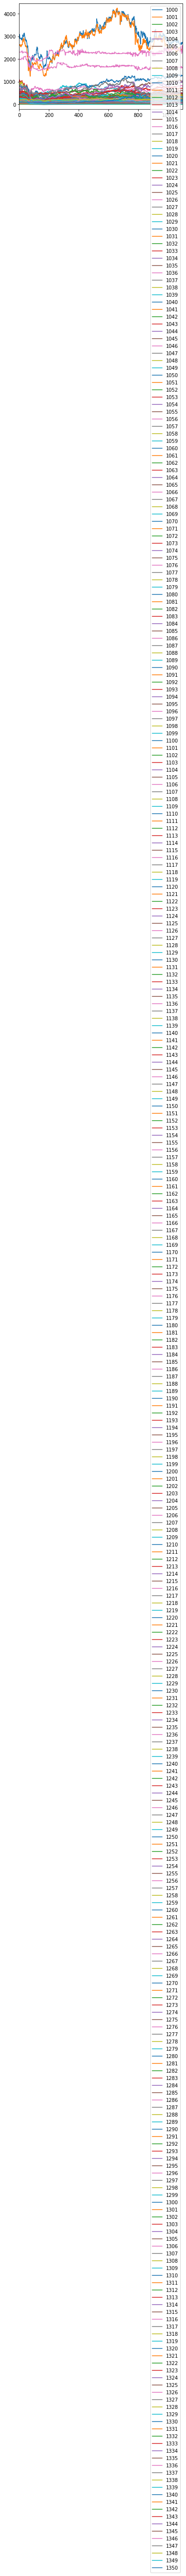

In [8]:
close.plot() 
plt.show()

In [156]:
from tslearn.clustering import TimeSeriesKMeans

In [157]:
km_dba = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=1000,
                           random_state=0, n_jobs=-1).fit(close.T)

In [158]:
import numpy as np
centers = np.array([i.reshape(-1) for i in km_dba.cluster_centers_])

In [159]:
centers

array([[  38.67877667,   38.52045333,   39.16021333, ...,   39.15030667,
          39.30866333,   39.5215    ],
       [2751.672     , 2755.896     , 2766.423     , ..., 2566.7136    ,
        2584.3389    , 2578.1844    ],
       [ 313.66154651,  315.3381    ,  324.87754047, ...,  331.50461581,
         334.83305721,  333.89923395],
       [2139.753     , 2139.753     , 2151.567     , ..., 2022.2829    ,
        1993.9161    , 1981.4817    ],
       [ 551.276825  ,  553.88487   ,  567.24613   , ...,  671.72996   ,
         680.167235  ,  681.393955  ],
       [ 141.84582383,  141.78400851,  145.51506574, ...,  149.5871183 ,
         150.1128434 ,  150.64017638]])

In [160]:
import pickle
with open('cluster.pkl', 'wb') as f:
    pickle.dump(km_dba, f)

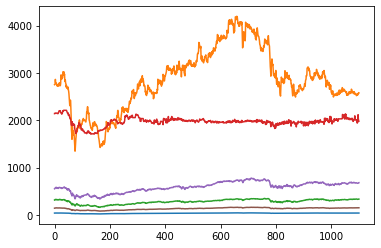

In [161]:
from matplotlib.pyplot import plot
plot(centers[0])
plot(centers[1])
plot(centers[2])
plot(centers[3])
plot(centers[4])
plot(centers[5])

In [162]:
stocks_groups = km_dba.predict(close.T)

/Users/wangyanpeng/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 351 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [163]:
d = {i:np.argwhere(stocks_groups == i).astype(int).reshape(-1) for i in range(6)}

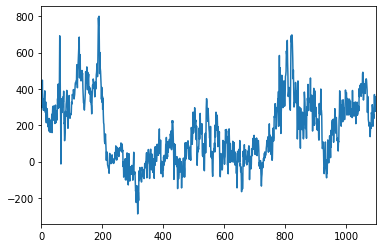

In [166]:
(close[np.array(all_codes)[d[1]][0]] - close[np.array(all_codes)[d[1]][1]]).plot()

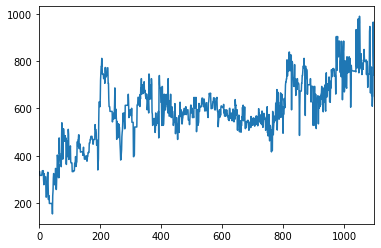

In [170]:
(close[np.array(all_codes)[d[3][0]]] - close[np.array(all_codes)[d[3][1]]]).plot()